In [1]:
#Install Dependencies

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Give random label
class RandomLabelDataset(Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset
        self.rand_labels = torch.randint(0, 10, (len(mnist_dataset),))

    def __len__(self):
        return len(self.mnist_dataset)

    def __getitem__(self, idx):
        img, _ = self.mnist_dataset[idx]
        return img, self.rand_labels[idx]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


# Apply random labels
trainset_random_labels = RandomLabelDataset(mnist_trainset)


# Just giving the training random labels
trainloader = DataLoader(trainset_random_labels, batch_size=64, shuffle=True)
testloader = DataLoader(mnist_testset, batch_size=64, shuffle=False)

/home/jtlumpk/.local/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


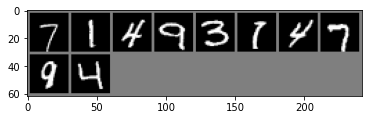

Shuffled Labels:      2     7     4     4     6     1     6     1     8     1


In [3]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images with shuffled labels
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show images and print labels to make sure shuffled
imshow(torchvision.utils.make_grid(images[:10]))
print('Shuffled Labels: ', ' '.join('%5s' % labels[j].item() for j in range(10)))


In [4]:
#  Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)

In [1]:
# Criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

NameError: name 'nn' is not defined

In [6]:
# Initialize lists to track the losses
train_losses = []
test_losses = []

for epoch in range(100):
    # train the model
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    #eval mode
    net.eval()
    test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    test_loss /= len(testloader)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1, Train Loss: 2.3036, Test Loss: 2.3074
Epoch 2, Train Loss: 2.3023, Test Loss: 2.3070
Epoch 3, Train Loss: 2.3017, Test Loss: 2.3078
Epoch 4, Train Loss: 2.3011, Test Loss: 2.3069
Epoch 5, Train Loss: 2.3006, Test Loss: 2.3077
Epoch 6, Train Loss: 2.3001, Test Loss: 2.3092
Epoch 7, Train Loss: 2.2996, Test Loss: 2.3056
Epoch 8, Train Loss: 2.2991, Test Loss: 2.3066
Epoch 9, Train Loss: 2.2985, Test Loss: 2.3041
Epoch 10, Train Loss: 2.2981, Test Loss: 2.3063
Epoch 11, Train Loss: 2.2976, Test Loss: 2.3060
Epoch 12, Train Loss: 2.2970, Test Loss: 2.3078
Epoch 13, Train Loss: 2.2965, Test Loss: 2.3040
Epoch 14, Train Loss: 2.2959, Test Loss: 2.3058
Epoch 15, Train Loss: 2.2952, Test Loss: 2.3075
Epoch 16, Train Loss: 2.2948, Test Loss: 2.3066
Epoch 17, Train Loss: 2.2940, Test Loss: 2.3067
Epoch 18, Train Loss: 2.2934, Test Loss: 2.3049
Epoch 19, Train Loss: 2.2927, Test Loss: 2.2999
Epoch 20, Train Loss: 2.2920, Test Loss: 2.2979
Epoch 21, Train Loss: 2.2913, Test Loss: 2.3113
E

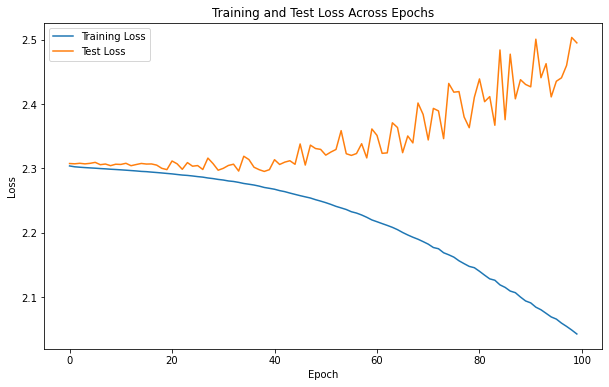

In [7]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Across Epochs')
plt.legend()
plt.show()